# Validating Naive Bayes without stopword cleaning

the classifier without stopword cleaning has been proven to be the best on training and testing data which is why it is used for validation

importing all necessary libraries

In [27]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import seaborn as sns # to visualize data
import pickle # to export classifiers 
from sklearn.metrics import * # calculation of metrics for validation purposes 
from nltk.classify import NaiveBayesClassifier # classifier used in the file        
from nltk.tokenize import word_tokenize # tokenizer used in the file

setting to show full text content

In [28]:
pd.set_option('display.max_colwidth', None)

## importing data and model

In [29]:
with open('../Training/naive_bayes/Naive_Bayes_with_stopwords_classifier.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

In [30]:
df_validation_naive_bayes_with_stopwords = pd.read_csv('../../Data-Preparation/twitter-corpus/full_corpus_preprocessed.csv')

In [31]:
df_validation_naive_bayes_with_stopwords.head()

,Ground_Truth_Label,Text,target_number
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4


using one-hot encoding for words present in a sentence

In [32]:
def extract_features(text):
    words = word_tokenize(text)
    features = {word.lower(): True for word in words if word.isalpha()}
    return features


In [33]:
df_validation_naive_bayes_with_stopwords['features'] = df_validation_naive_bayes_with_stopwords['Text'].apply(lambda text: extract_features(str(text)))

In [34]:
df_validation_naive_bayes_with_stopwords.head()

,Ground_Truth_Label,Text,target_number,features
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4,"{'now': True, 'all': True, 'apple': True, 'has': True, 'to': True, 'do': True, 'is': True, 'get': True, 'swype': True, 'on': True, 'the': True, 'iphone': True, 'and': True, 'it': True, 'will': True, 'be': True, 'crack': True, 'that': True}"
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4,"{'apple': True, 'will': True, 'be': True, 'adding': True, 'more': True, 'carrier': True, 'support': True, 'to': True, 'the': True, 'iphone': True, 'just': True, 'announced': True}"
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4,"{'hilarious': True, 'youtube': True, 'video': True, 'guy': True, 'does': True, 'a': True, 'duet': True, 'with': True, 'apple': True, 'siri': True, 'pretty': True, 'much': True, 'sums': True, 'up': True, 'the': True, 'love': True, 'affair': True, 'http': True}"
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4,"{'rim': True, 'you': True, 'made': True, 'it': True, 'too': True, 'easy': True, 'for': True, 'me': True, 'to': True, 'switch': True, 'apple': True, 'iphone': True, 'see': True, 'ya': True}"
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4,"{'i': True, 'just': True, 'realized': True, 'that': True, 'the': True, 'reason': True, 'got': True, 'into': True, 'twitter': True, 'was': True, 'thanks': True, 'apple': True}"


adding column for prediction of the classifier for the test data

In [35]:

df_validation_naive_bayes_with_stopwords['Prediction'] = df_validation_naive_bayes_with_stopwords['features'].apply(classifier.classify)

## Testing quality of the classifier on validation data

calculating metrics to quanitfy the quality of the model

In [36]:
accuracy = accuracy_score(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'])
precision = precision_score(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
recall = recall_score(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
f1 = f1_score(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'],beta=beta, pos_label='positive')


In [37]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.72
Precision: 0.76
Recall: 0.64
F1 Score: 0.69
F-beta Score (beta=0.7071067811865475): 0.7130620985010707


In [38]:
print("\nClassification Report:\n")
print(classification_report(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.69      0.79      0.74       519
    positive       0.76      0.64      0.69       519

    accuracy                           0.72      1038
   macro avg       0.72      0.72      0.72      1038
weighted avg       0.72      0.72      0.72      1038



creating heatmap to visualize false positives and false negatives

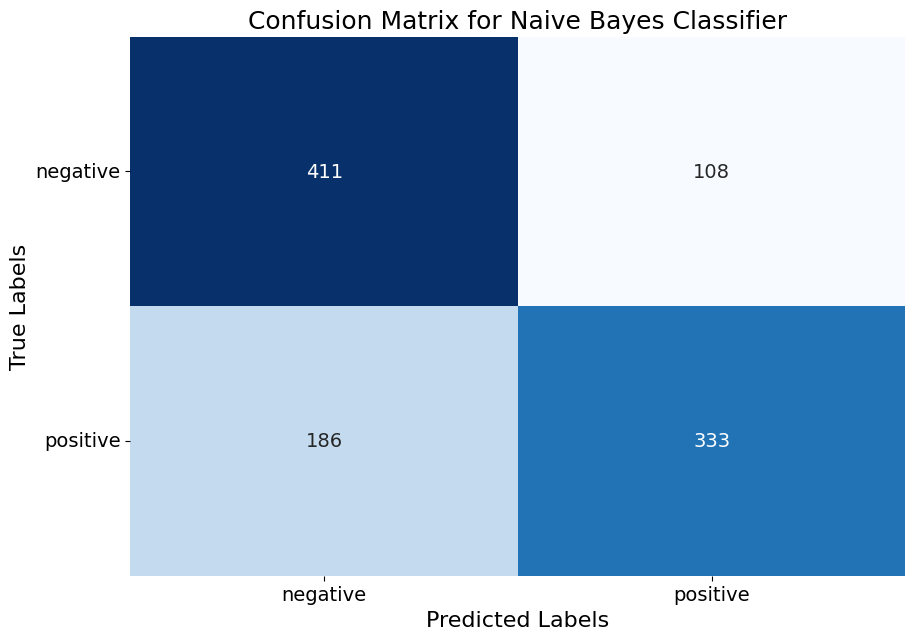

In [39]:
cm_nb = confusion_matrix(df_validation_naive_bayes_with_stopwords['Ground_Truth_Label'], df_validation_naive_bayes_with_stopwords['Prediction'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()